## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 10.0) # set default size of plots
sns.set()
%matplotlib inline

## Import Data

In [2]:
! ls Data

TempData.csv


In [3]:
df_raw = pd.read_csv("Data/TempData.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 39 columns):
index                    2716 non-null int64
Unnamed: 0               2716 non-null int64
alcohol_use              0 non-null float64
anencephaly              2305 non-null float64
attendant                2700 non-null object
birth_loc_type           2319 non-null float64
birth_month              2716 non-null object
birth_state              0 non-null float64
birth_weight             2709 non-null float64
birth_year               2716 non-null int64
cigarette_use            0 non-null float64
cigarettes_per_day       0 non-null float64
cigarettes_trimester1    2169 non-null float64
cigarettes_trimester2    2169 non-null float64
cigarettes_trimester3    2169 non-null float64
day                      2716 non-null object
delivery_method          2710 non-null object
downs syndrome           2305 non-null float64
drinks_per_week          0 non-null float64
father_age               

## Clean the missing information

In [4]:
df_temp = df_raw.dropna(axis=1, how='all')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 27 columns):
index                    2716 non-null int64
Unnamed: 0               2716 non-null int64
anencephaly              2305 non-null float64
attendant                2700 non-null object
birth_loc_type           2319 non-null float64
birth_month              2716 non-null object
birth_weight             2709 non-null float64
birth_year               2716 non-null int64
cigarettes_trimester1    2169 non-null float64
cigarettes_trimester2    2169 non-null float64
cigarettes_trimester3    2169 non-null float64
day                      2716 non-null object
delivery_method          2710 non-null object
downs syndrome           2305 non-null float64
father_race              1822 non-null object
gestation_weeks          2714 non-null float64
infant_sex               2716 non-null object
mother_age               2716 non-null int64
mother_education         2319 non-null object
mother_marital_

In [5]:
df = df_temp.dropna(subset=['birth_weight', 'cigarettes_trimester1'], how='any').sample(frac=0.1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 847 to 2461
Data columns (total 27 columns):
index                    216 non-null int64
Unnamed: 0               216 non-null int64
anencephaly              216 non-null float64
attendant                216 non-null object
birth_loc_type           216 non-null float64
birth_month              216 non-null object
birth_weight             216 non-null float64
birth_year               216 non-null int64
cigarettes_trimester1    216 non-null float64
cigarettes_trimester2    216 non-null float64
cigarettes_trimester3    216 non-null float64
day                      216 non-null object
delivery_method          216 non-null object
downs syndrome           216 non-null float64
father_race              167 non-null object
gestation_weeks          216 non-null float64
infant_sex               216 non-null object
mother_age               216 non-null int64
mother_education         216 non-null object
mother_marital_status    216 non-

In [6]:
df.describe()

,index,Unnamed: 0,anencephaly,birth_loc_type,birth_weight,birth_year,cigarettes_trimester1,cigarettes_trimester2,cigarettes_trimester3,downs syndrome,gestation_weeks,mother_age,spina_bifida,timestamp,weight_gain
count,216.000000,216.000000,216.0,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.0,216.000000,216.000000,216.0,2.160000e+02,208.000000
mean,1423.254630,1423.254630,0.0,1.027778,3983.009259,2012.0,0.435185,0.328704,0.282407,0.0,39.138889,29.648148,0.0,1.340464e+09,29.951923
std,751.068699,751.068699,0.0,0.303724,786.904722,0.0,2.035833,1.767487,1.714199,0.0,1.653514,6.228688,0.0,8.717857e+06,14.420450
min,156.000000,156.000000,0.0,1.000000,2500.000000,2012.0,0.000000,0.000000,0.000000,0.0,31.000000,15.000000,0.0,1.325499e+09,0.000000
25%,832.500000,832.500000,0.0,1.000000,4000.000000,2012.0,0.000000,0.000000,0.000000,0.0,38.000000,25.000000,0.0,1.332107e+09,20.750000
50%,1364.000000,1364.000000,0.0,1.000000,4000.000000,2012.0,0.000000,0.000000,0.000000,0.0,39.000000,30.000000,0.0,1.340802e+09,29.000000
75%,2032.750000,2032.750000,0.0,1.000000,4500.000000,2012.0,0.000000,0.000000,0.000000,0.0,40.000000,34.000000,0.0,1.347539e+09,38.000000
max,2715.000000,2715.000000,0.0,5.000000,8165.000000,2012.0,20.000000,20.000000,20.000000,0.0,42.000000,44.000000,0.0,1.356973e+09,98.000000


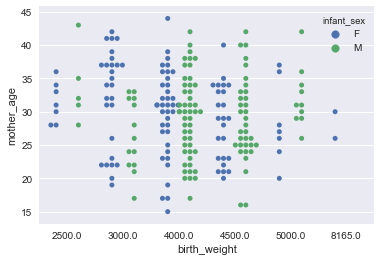

In [7]:
plt.clf()
sns.swarmplot(x="birth_weight", y="mother_age", hue="infant_sex", data=df, split=True)
plt.show()